In [6]:
import nltk
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [15]:
df= pd.read_csv(r"C:\Users\Arvind Vasa\OneDrive\Desktop\DL _ NLP By Sundaram- 6th Feb 2023\15th March 2023\spam.tsv", sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [16]:
df.shape

(5572, 4)

In [17]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [19]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

### Hadling imbalanced data

In [21]:
ham= df[df['label']=='ham']
spam= df[df['label']=='spam']

In [22]:
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [23]:
ham.shape

(4825, 4)

In [24]:
spam.shape

(747, 4)

In [35]:
# Undersampling

ham1= ham.sample(spam.shape[0])
ham1.shape

(747, 4)

In [39]:
!pip install pandas

In [42]:
# balance your data where target value is spam or ham

data= pd.concat([ham1, spam], ignore_index= True)
data.shape

(1494, 4)

In [44]:
data.head()

,label,message,length,punct
0,ham,Oh great. I.ll disturb him more so that we can...,52,3
1,ham,"I can. But it will tell quite long, cos i have...",71,6
2,ham,Really dun bluff me leh... U sleep early too. ...,53,7
3,ham,"Whatever, juliana. Do whatever you want.",40,3
4,ham,Also remember to get dobby's bowl from your car,47,1


In [45]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

(array([ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  3.,  0.,  1.,  1.,
         2.,  1.,  1.,  4.,  4.,  2.,  0.,  0.,  1.,  0.,  1.,  3.,  1.,
         4.,  4.,  6.,  3.,  2.,  0.,  6.,  2.,  3.,  0.,  5.,  0.,  1.,
         5.,  4.,  9.,  2.,  4.,  9.,  6.,  6.,  3., 10.,  1., 11., 10.,
         5., 10.,  3., 10., 13., 14., 27., 18., 23., 25., 27., 32., 32.,
        18., 49., 58., 68., 76., 65.,  6.,  8.,  1.,  2.,  2.,  2.,  2.,
         1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 13. ,  15.1,  17.2,  19.3,  21.4,  23.5,  25.6,  27.7,  29.8,
         31.9,  34. ,  36.1,  38.2,  40.3,  42.4,  44.5,  46.6,  48.7,
         50.8,  52.9,  55. ,  57.1,  59.2,  61.3,  63.4,  65.5,  67.6,
         69.7,  71.8,  73.9,  76. ,  78.1,  80.2,  82.3,  84.4,  86.5,
         88.6,  90.7,  92.8,  94.9,  97. ,  99.1, 101.2, 103.3, 105.4,
        107.5, 109.6, 111.7, 113.8, 115.9, 118. , 120.1, 122.2, 124.3,
        

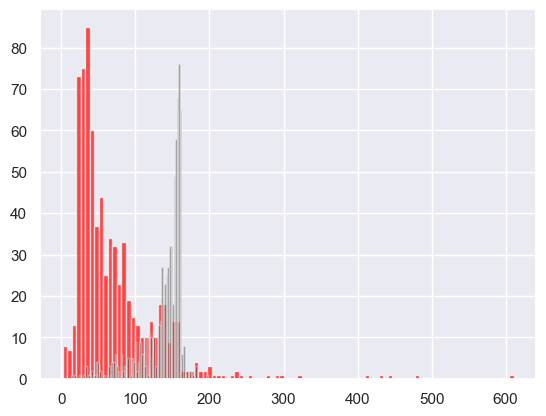

In [50]:
plt.hist(data[data['label']=='ham']['length'], bins= 100, alpha= 0.7, color='red')
plt.hist(data[data['label']=='spam']['length'], bins= 100, alpha= 0.4, color='black')

(array([ 23.,   0.,   0.,  26.,   0.,   0.,   0.,  73.,   0.,   0.,   0.,
        115.,   0.,   0.,   0.,  77.,   0.,   0.,   0.,  67.,   0.,   0.,
          0.,  86.,   0.,   0.,  74.,   0.,   0.,   0.,  66.,   0.,   0.,
          0.,  49.,   0.,   0.,   0.,  27.,   0.,   0.,   0.,  17.,   0.,
          0.,   0.,  22.,   0.,   0.,   0.,  14.,   0.,   0.,   2.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14

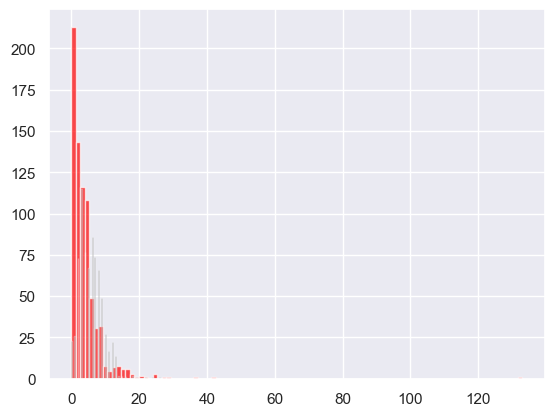

In [53]:
plt.hist(data[data['label']=='ham']['punct'], bins= 100, alpha= 0.7, color='red')
plt.hist(data[data['label']=='spam']['punct'], bins= 100, alpha= 0.4, color='black')

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test= train_test_split(data['message'], data['label'], test_size=0.3, random_state=1)

In [57]:
x_train

1013    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
188                  Wewa is 130. Iriver 255. All 128 mb.
189     Joy's father is John. Then John is the ____ of...
561     Me sef dey laugh you. Meanwhile how's my darli...
1021    Guess what! Somebody you know secretly fancies...
                              ...                        
715     Lol or I could just starve and lose a pound by...
905     18 days to Euro2004 kickoff! U will be kept in...
1096    This message is brought to you by GMW Ltd. and...
235     Be sure to check your yahoo email. We sent pho...
1061    <Forwarded from 88877>FREE entry into our £250...
Name: message, Length: 1045, dtype: object

## Build NLP model

In [62]:
# Text analytics for spam detection
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine learning model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# pipeline package to merge NLP and Machine learning together to get output
from sklearn.pipeline import Pipeline

## Random forest classifier

In [64]:
## rando
classifier= Pipeline([('TF-IDF', TfidfVectorizer())
                    ,('Classifier', RandomForestClassifier())
                     ])

In [65]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [66]:
# Predict the model using train and test data
y_pred_train= classifier.predict(x_train)
y_pred_test= classifier.predict(x_test)

In [67]:
y_pred_train

array(['spam', 'ham', 'ham', ..., 'spam', 'ham', 'spam'], dtype=object)

## Evaluation matrix

In [77]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [75]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[525   0]
 [  0 520]]

[[219   3]
 [ 22 205]]


In [78]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       525
        spam       1.00      1.00      1.00       520

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045


              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       222
        spam       0.99      0.90      0.94       227

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [79]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

1.0

0.9443207126948775


## SVC

In [90]:
## SVC
classifier2= Pipeline([('TF-IDF', TfidfVectorizer())
                    ,('Classifier', SVC(C= 1.0, gamma='scale'))
                     ])

In [91]:
classifier2.fit(x_train, y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()), ('Classifier', SVC())])

In [92]:
# Predict the model using train and test data
y_pred_train= classifier2.predict(x_train)
y_pred_test= classifier2.predict(x_test)

In [93]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[525   0]
 [  1 519]]

[[219   3]
 [ 17 210]]


In [94]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       525
        spam       1.00      1.00      1.00       520

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045


              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       222
        spam       0.99      0.93      0.95       227

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [95]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.999043062200957

0.955456570155902


## XGBoost

In [97]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 3.2 MB/s eta 0:00:00


In [98]:
from xgboost import XGBClassifier

In [99]:
classifier3= Pipeline([('TF-IDF', TfidfVectorizer())
                    ,('Classifier', XGBClassifier())
                     ])

In [103]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
y_train= le.fit_transform(y_train)

In [108]:
y_test= le.fit_transform(y_test)

In [105]:
classifier3.fit(x_train, y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [106]:
# Predict the model using train and test data
y_pred_train= classifier3.predict(x_train)
y_pred_test= classifier3.predict(x_test)

In [109]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[525   0]
 [  4 516]]

[[208  14]
 [ 19 208]]


In [111]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       525
           1       1.00      0.99      1.00       520

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       222
           1       0.94      0.92      0.93       227

    accuracy                           0.93       449
   macro avg       0.93      0.93      0.93       449
weighted avg       0.93      0.93      0.93       449



In [110]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.9961722488038277

0.9265033407572383


In [113]:
# Random forest is the best model
# without balancing data

In [117]:
classifier4= Pipeline([('TF-IDF', TfidfVectorizer())
                        ,('Classifier', RandomForestClassifier())
                      ])

In [118]:
classifier4.fit(x_train, y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [119]:
y_pred_train= classifier4.predict(x_train)
y_pred_test= classifier4.predict(x_test)

In [120]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[525   0]
 [  0 520]]

[[217   5]
 [ 18 209]]


In [121]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       520

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       222
           1       0.98      0.92      0.95       227

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [122]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

1.0

0.9487750556792873


In [123]:
df2= pd.read_csv(r'C:\Users\Arvind Vasa\OneDrive\Desktop\DL _ NLP By Sundaram- 6th Feb 2023\15th March 2023\Restaurant_Reviews.tsv', sep='\t')

In [124]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
